In [ ]:
#Name: Musharaf Ali
#Train a CNN on the SVHN Dataset for Classification

In [17]:
import warnings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow

# Details


1. import warnings loads the warnings module to manage warning messages during execution.

2. import os loads the os module, allowing interaction with the operating system for tasks like file handling and directory navigation.

3. import pandas as pd imports the pandas library as pd, providing data structures for manipulating and analyzing structured data.

4. import numpy as np imports the numpy library as np, essential for numerical computing, including support for arrays and mathematical operations.

5. import matplotlib.pyplot as plt imports the pyplot module from matplotlib as plt, simplifying the process of creating visualizations.

6. %matplotlib inline is a Jupyter notebook command that enables inline plotting, displaying graphs directly below the code cells.


In [18]:
import h5py
h5f = h5py.File("Autonomous_Vehicles_SVHN_single_grey1.h5")
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

# Details



1. import h5py imports the h5py library, which is used for reading and writing HDF5 files in Python. HDF5 is a file format and set of tools for managing complex data.

2. h5f = h5py.File("Autonomous_Vehicles_SVHN_single_grey1.h5") opens the HDF5 file named "Autonomous_Vehicles_SVHN_single_grey1.h5" and assigns it to the variable h5f. This line allows you to access the contents of the HDF5 file.



In [19]:
X_train = h5f[X_train][:]
y_train = h5f[y_train][:]
X_test = h5f[X_test][:]
y_test = h5f[y_test][:]


# Details



1. X_train = h5f[X_train][:] retrieves the dataset associated with the key X_train from the opened HDF5 file (h5f) and loads its contents into the variable X_train. The [:] syntax is used to read all the data from the dataset.

2. y_train = h5f[y_train][:] retrieves the dataset associated with the key y_train from h5f and loads it into the variable y_train, using the same [:] syntax to read all the data.



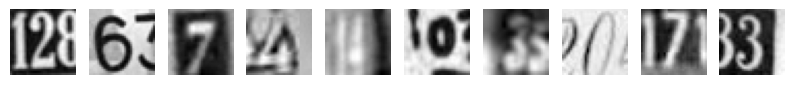

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


In [20]:
def img_lab(n):
    plt.figure(figsize=(n, 1))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X_train[i], cmap=gray)
        plt.axis(off)
    plt.show()
    print(label for each of the above image:%s % (y_train[0:n]))
img_lab(10)


# Details



1. def img_lab(n): defines a function named img_lab that takes one parameter, n, which specifies the number of images to display.

2. plt.figure(figsize=(n, 1)) creates a new figure for plotting with a width of n and a height of 1, allowing space for the images to be displayed side by side.

3. for i in range(n): starts a loop that iterates n times, with i ranging from 0 to n-1.

4. plt.subplot(1, n, i+1) creates a subplot in a grid of 1 row and n columns, placing the current plot in the i+1 position. This organizes the layout for displaying multiple images.

5. plt.imshow(X_train[i], cmap=gray) displays the i-th image from the X_train dataset. The cmap=gray argument specifies that the image should be shown in grayscale. Note that gray should be enclosed in quotes, as it should be a string ('gray').



In [21]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0


# Details


1. X_train = X_train.reshape(X_train.shape[0], 1024, 1) reshapes the X_train array. It keeps the first dimension as is (X_train.shape[0], representing the number of training samples) and reshapes each sample into a 1D array of size 1024 with a single channel. This is often done for models that expect inputs in a specific shape.

2. X_test = X_test.reshape(X_test.shape[0], 1024, 1) similarly reshapes the X_test array to the same format as X_train, preparing the test data for input into a model.

3. X_train = X_train / 255.0 normalizes the X_train data by dividing each pixel value by 255.0. This scales the pixel values from the range of 0-255 to a range of 0-1, which helps improve model performance and convergence during training.


In [22]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Details


1. from tensorflow.keras.utils import to_categorical imports the to_categorical function from TensorFlow's Keras utilities. This function is used to convert class labels (integers) into a binary matrix representation (one-hot encoding).

2. y_train = to_categorical(y_train) converts the y_train array of integer labels into a one-hot encoded format. For example, if the original label was 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def cnn_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation=relu, input_shape=(1024, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation=relu))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation=relu))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation=relu))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation=softmax))
    return model

model = cnn_model()


# Details


1. from tensorflow.keras.models import Sequential imports the Sequential model type from Keras, allowing you to build a model layer by layer.

2. from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout imports various layer types that can be used to build the convolutional neural network (CNN). 

3. def cnn_model(): defines a function named cnn_model that will create and return a convolutional neural network model.

4. model = Sequential() initializes a new instance of the Sequential model.

5. model.add(Conv1D(32, kernel_size=3, activation=relu, input_shape=(1024, 1))) adds a 1D convolutional layer with 32 filters, a kernel size of 3, and a ReLU activation function. The input_shape specifies the shape of the input data (1024 time steps with 1 feature).

6. model.add(MaxPooling1D(pool_size=2)) adds a max pooling layer with a pool size of 2, reducing the output dimensionality by taking the maximum value from every two consecutive elements.

7. model.add(Conv1D(64, kernel_size=3, activation=relu)) adds another convolutional layer with 64 filters and the same kernel size and activation function as before.

8. model.add(MaxPooling1D(pool_size=2)) adds another max pooling layer, further downsampling the output.

9. model.add(Conv1D(128, kernel_size=3, activation=relu)) adds a third convolutional layer with 128 filters.

10. model.add(MaxPooling1D(pool_size=2)) adds another max pooling layer.

11. model.add(Flatten()) flattens the output from the previous layer into a 1D array, preparing it for the fully connected layers..


In [24]:
model.compile(optimizer=adam, loss=categorical_crossentropy, metrics=[accuracy])
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 108s 80ms/step - accuracy: 0.2635 - loss: 2.0061 - val_accuracy: 0.6397 - val_loss: 1.1471
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.5718 - loss: 1.2922 - val_accuracy: 0.6762 - val_loss: 1.0195
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 113s 86ms/step - accuracy: 0.6108 - loss: 1.1766 - val_accuracy: 0.6898 - val_loss: 0.9643
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 112s 85ms/step - accuracy: 0.6311 - loss: 1.0997 - val_accuracy: 0.6988 - val_loss: 0.9372
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 145s 87ms/step - accuracy: 0.6467 - loss: 1.0546 - val_accuracy: 0.7152 - val_loss: 0.8842
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 114s 87ms/step - accuracy: 0.6563 - loss: 1.0175 - val_accuracy: 0.7192 - val_loss: 0.8817
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 114s 87ms/step - accuracy: 0.6677 - loss: 0.9809 - val_accuracy: 0.7215 - val_loss: 0.8595
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 99s 75ms/step - accuracy: 0

# Details


1. model.compile(optimizer=adam, loss=categorical_crossentropy, metrics=[accuracy]) configures the model for training:
   - optimizer=adam specifies the Adam optimizer, which is an adaptive learning rate optimization algorithm commonly used in training deep learning models.
   - loss=categorical_crossentropy sets the loss function to categorical crossentropy, which is suitable for multi-class classification problems where the labels are one-hot encoded.
   - metrics=[accuracy] defines the metrics to monitor during training and evaluation, with accuracy being the primary metric of interest.

2. training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10) trains the model on the training data:
   - X_train and y_train are the training features and labels, respectively.
   - validation_data=(X_test, y_test) specifies the validation dataset to evaluate the model's performance after each epoch. This helps monitor overfitting.
   - epochs=10 sets the number of complete passes through the training dataset to 10.


In [25]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(Loss:, scores[0])
print(Accuracy:, scores[1])


Loss: 0.8283211588859558
Accuracy: 0.7326666712760925


# Details

1. scores = model.evaluate(X_test, y_test, verbose=0) evaluates the trained model on the test dataset:
   - X_test and y_test are the test features and labels, respectively.
   - The evaluate method computes the loss and specified metrics (accuracy in this case) on the test data.
   - verbose=0 suppresses the output, so it won’t print progress information during evaluation.

2. print(Loss:, scores[0]) prints the loss value obtained from the evaluation:
   - scores[0] corresponds to the first element of the scores array, which is the loss value.

3. print(Accuracy:, scores[1]) prints the accuracy value obtained from the evaluation:
   - scores[1] corresponds to the second element of the scores array, which is the accuracy.


Text(0.5, 1.0, 'Training and validation loss')

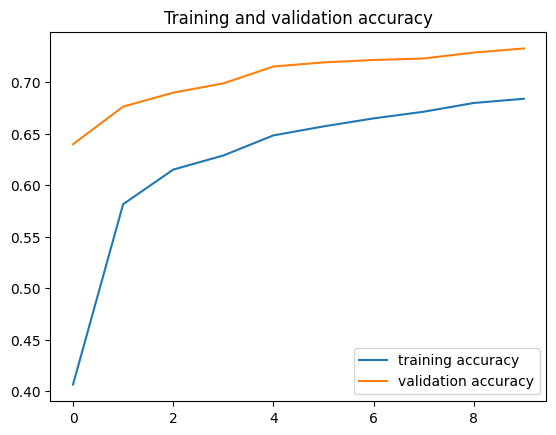

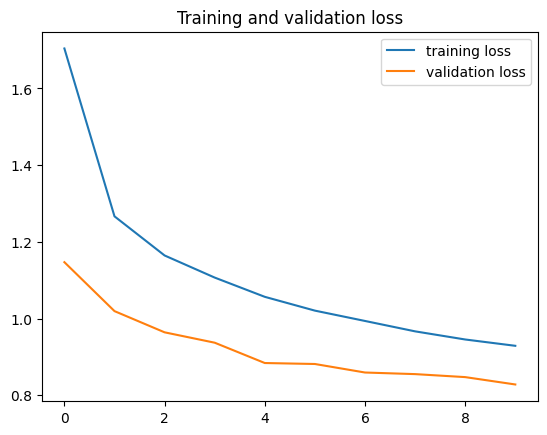

In [26]:
accuracy = training_history.history[accuracy]
val_accuracy = training_history.history[val_accuracy]
loss = training_history.history[loss]
val_loss = training_history.history[val_loss]

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label=training accuracy)
plt.plot(epochs, val_accuracy, label=validation accuracy)
plt.legend(loc=lower right)
plt.title(Training and validation accuracy)
plt.figure()
plt.plot(epochs, loss, label=training loss)
plt.plot(epochs, val_loss, label=validation loss)
plt.legend(loc=upper right)
plt.title(Training and validation loss)


# Details


1. accuracy = training_history.history[accuracy] retrieves the training accuracy values from the training history object. The history attribute contains metrics recorded during training.
2. val_accuracy = training_history.history[val_accuracy] retrieves the validation accuracy values from the training history.
3. loss = training_history.history[loss] retrieves the training loss values from the training history.
4. val_loss = training_history.history[val_loss] retrieves the validation loss values from the training history.
5. epochs = range(len(accuracy)) creates a range object representing the number of epochs, which will be used for the x-axis in the plots.
6. plt.plot(epochs, accuracy, label=training accuracy) plots the training accuracy against the number of epochs. The label parameter is used for the legend.
7. plt.plot(epochs, val_accuracy, label=validation accuracy) plots the validation accuracy against the number of epochs.
8. plt.legend(loc=lower right) adds a legend to the plot in the lower right corner.
9. plt.title(Training and validation accuracy) sets the title of the accuracy plot.
10. plt.figure() creates a new figure for the next plot, separating it from the accuracy plot.
11. plt.plot(epochs, loss, label=training loss) plots the training loss against the number of epochs.
12. plt.plot(epochs, val_loss, label=validation loss) plots the validation loss against the number of epochs.
13. plt.legend(loc=upper right) adds a legend to the loss plot in the upper right corner.
14. plt.title(Training and validation loss) sets the title of the loss plot.
